In [23]:
#Импорт библиотек

In [24]:
import pandas as pd
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.svm import LinearSVC
import spacy
from sklearn.ensemble import StackingClassifier
import re
from spacy.tokens import Doc
from xgboost import XGBClassifier

In [25]:
#Классы обработки данных для TfidfVectorizer 

In [26]:
class Selector(BaseEstimator, TransformerMixin):  
          
    def __init__(self, features):
        self.features = features
    
    def fit(self, X, y=None):       
        return self

    def transform(self, X, y=None):
        
        return X[self.features]

In [27]:
class To_list(BaseEstimator, TransformerMixin):  
              
    def fit(self, X, y=None):       
        return self

    def transform(self, X, y=None):
        X_new = []
        X = X.values
        X = X.tolist()
        for sublist in X:
            for item in sublist:
                X_new.append(item)
        return X_new

In [28]:
#Чтение и обработка данных

In [29]:
train = pd.read_json("C:\multinli_1.0_train.jsonl", lines=True)
dev_matched = pd.read_json("C:\multinli_1.0_dev_matched.jsonl", lines=True)
dev_mismatched = pd.read_json("C:\multinli_1.0_dev_mismatched.jsonl", lines=True)
test_matched = pd.read_json("C:\multinli_0.9_test_matched_unlabeled.jsonl", lines=True)
test_mismatched = pd.read_json("C:\multinli_0.9_test_mismatched_unlabeled.jsonl", lines=True)

In [30]:
train

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,[neutral],government,neutral,31193n,31193,Conceptually cream skimming has two basic dime...,( ( Conceptually ( cream skimming ) ) ( ( has ...,(ROOT (S (NP (JJ Conceptually) (NN cream) (NN ...,Product and geography are what make cream skim...,( ( ( Product and ) geography ) ( ( are ( what...,(ROOT (S (NP (NN Product) (CC and) (NN geograp...
1,[entailment],telephone,entailment,101457e,101457,you know during the season and i guess at at y...,( you ( ( know ( during ( ( ( the season ) and...,(ROOT (S (NP (PRP you)) (VP (VBP know) (PP (IN...,You lose the things to the following level if ...,( You ( ( ( ( lose ( the things ) ) ( to ( the...,(ROOT (S (NP (PRP You)) (VP (VBP lose) (NP (DT...
2,[entailment],fiction,entailment,134793e,134793,One of our number will carry out your instruct...,( ( One ( of ( our number ) ) ) ( ( will ( ( (...,(ROOT (S (NP (NP (CD One)) (PP (IN of) (NP (PR...,A member of my team will execute your orders w...,( ( ( A member ) ( of ( my team ) ) ) ( ( will...,(ROOT (S (NP (NP (DT A) (NN member)) (PP (IN o...
3,[entailment],fiction,entailment,37397e,37397,How do you know? All this is their information...,( ( How ( ( ( do you ) know ) ? ) ) ( ( All th...,(ROOT (S (SBARQ (WHADVP (WRB How)) (SQ (VBP do...,This information belongs to them.,( ( This information ) ( ( belongs ( to them )...,(ROOT (S (NP (DT This) (NN information)) (VP (...
4,[neutral],telephone,neutral,50563n,50563,yeah i tell you what though if you go price so...,( yeah ( i ( ( tell you ) ( what ( ( though ( ...,(ROOT (S (VP (VB yeah) (S (NP (FW i)) (VP (VB ...,The tennis shoes have a range of prices.,( ( The ( tennis shoes ) ) ( ( have ( ( a rang...,(ROOT (S (NP (DT The) (NN tennis) (NNS shoes))...
...,...,...,...,...,...,...,...,...,...,...,...
392697,[contradiction],government,contradiction,30418c,30418,"Clearly, California can - and must - do better.","( Clearly ( , ( California ( ( ( can ( - ( and...","(ROOT (S (ADVP (RB Clearly)) (, ,) (NP (NNP Ca...",California cannot do any better.,( California ( ( ( can not ) ( do ( any better...,(ROOT (S (NP (NNP California)) (VP (MD can) (R...
392698,[neutral],travel,neutral,105454n,105454,It was once regarded as the most beautiful str...,( It ( ( ( was once ) ( regarded ( as ( ( the ...,(ROOT (S (NP (PRP It)) (VP (VBD was) (ADVP (RB...,So many of the original buildings had been rep...,( So ( ( many ( of ( the ( original buildings ...,(ROOT (S (IN So) (NP (NP (JJ many)) (PP (IN of...
392699,[entailment],travel,entailment,13960e,13960,Houseboats are a beautifully preserved traditi...,( Houseboats ( ( are ( ( a ( ( beautifully pre...,(ROOT (S (NP (NNS Houseboats)) (VP (VBP are) (...,The tradition of houseboats originated while t...,( ( ( The tradition ) ( of houseboats ) ) ( ( ...,(ROOT (S (NP (NP (DT The) (NN tradition)) (PP ...
392700,[neutral],slate,neutral,114061n,114061,Obituaries fondly recalled his on-air debates ...,( Obituaries ( fondly ( ( ( ( recalled ( his (...,(ROOT (S (NP (NNS Obituaries)) (ADVP (RB fondl...,The obituaries were beautiful and written in k...,( ( The obituaries ) ( ( were ( ( beautiful an...,(ROOT (S (NP (DT The) (NNS obituaries)) (VP (V...


In [31]:
dev_matched

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,"[neutral, entailment, neutral, neutral, neutral]",slate,neutral,63735n,63735,The new rights are nice enough,( ( The ( new rights ) ) ( are ( nice enough )...,(ROOT (S (NP (DT The) (JJ new) (NNS rights)) (...,Everyone really likes the newest benefits,( Everyone ( really ( likes ( the ( newest ben...,(ROOT (S (NP (NN Everyone)) (VP (ADVP (RB real...
1,"[contradiction, contradiction, contradiction, ...",government,contradiction,91383c,91383,This site includes a list of all award winners...,( ( This site ) ( ( includes ( ( ( ( a list ) ...,(ROOT (S (NP (DT This) (NN site)) (VP (VBZ inc...,The Government Executive articles housed on th...,( ( ( The ( Government ( Executive articles ) ...,(ROOT (S (NP (NP (DT The) (NNP Government) (NN...
2,"[entailment, entailment, entailment, entailmen...",telephone,entailment,755e,755,uh i don't know i i have mixed emotions about ...,( ( ( ( uh ( i ( ( do n't ) ( know ( ( i i ) (...,(ROOT (SINV (S (S (INTJ (UH uh)) (NP (FW i)) (...,"I like him for the most part, but would still ...",( I ( ( ( ( ( ( like him ) ( for ( the ( most ...,(ROOT (S (NP (PRP I)) (VP (VP (VBP like) (NP (...
3,"[contradiction, contradiction, contradiction, ...",telephone,contradiction,78013c,78013,yeah i i think my favorite restaurant is alway...,( yeah ( ( i i ) ( think ( ( my ( favorite res...,(ROOT (S (VP (VB yeah) (NP (NP (FW i) (FW i)) ...,My favorite restaurants are always at least a ...,( ( My ( favorite restaurants ) ) ( ( ( ( are ...,(ROOT (S (NP (PRP$ My) (JJ favorite) (NNS rest...
4,"[contradiction, contradiction, contradiction, ...",telephone,contradiction,96377c,96377,i don't know um do you do a lot of camping,( i ( ( do n't ) ( know ( um ( do ( you ( do (...,(ROOT (S (NP (FW i)) (VP (VBP do) (RB n't) (VP...,I know exactly.,( I ( ( know exactly ) . ) ),(ROOT (S (NP (PRP I)) (VP (VBP know) (ADVP (RB...
...,...,...,...,...,...,...,...,...,...,...,...
9995,"[neutral, neutral, entailment, neutral, entail...",government,neutral,11879n,11879,"Since 1998, LSC has initiated and overseen sig...","( ( Since 1998 ) ( , ( LSC ( ( has ( ( ( ( ( (...","(ROOT (S (PP (IN Since) (NP (CD 1998))) (, ,) ...",LSC has been focusing on improving it's state ...,( LSC ( ( has ( been ( focusing ( on ( ( impro...,(ROOT (S (NP (NNP LSC)) (VP (VBZ has) (VP (VBN...
9996,"[contradiction, contradiction, contradiction, ...",slate,contradiction,40715c,40715,Eighty percent of pagers in the United States ...,( ( ( Eighty percent ) ( of ( pagers ( in ( th...,(ROOT (S (NP (NP (JJ Eighty) (NN percent)) (PP...,Pagers in the United States were unaffected by...,( ( Pagers ( in ( the ( United States ) ) ) ) ...,(ROOT (S (NP (NP (NNS Pagers)) (PP (IN in) (NP...
9997,"[entailment, entailment, entailment, entailmen...",government,entailment,4294e,4294,"Finally, the FDA will conduct workshops, issue...","( Finally ( , ( ( the FDA ) ( ( will ( ( ( ( (...","(ROOT (S (ADVP (RB Finally)) (, ,) (NP (DT the...",The FDA is set to conduct workshops.,( ( The FDA ) ( ( is ( set ( to ( conduct work...,(ROOT (S (NP (DT The) (NNP FDA)) (VP (VBZ is) ...
9998,"[entailment, entailment, entailment, entailmen...",travel,entailment,30880e,30880,Cirque du Soleil's The latest from the acclaim...,( ( ( Cirque ( du Soleil ) ) ( 's ( ( The late...,(ROOT (S (S (NP (NNP Cirque) (NNP du) (NNP Sol...,Cirque du Soleil is an international troupe.,( ( Cirque ( du Soleil ) ) ( ( is ( an ( inter...,(ROOT (S (NP (NNP Cirque) (NNP du) (NNP Soleil...


In [32]:
dev_mismatched

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,"[contradiction, contradiction, contradiction, ...",letters,contradiction,75290c,75290,Your contribution helped make it possible for ...,( ( Your contribution ) ( ( helped ( make ( it...,(ROOT (S (NP (PRP$ Your) (NN contribution)) (V...,Your contributions were of no help with our st...,( ( Your contributions ) ( ( were ( of ( ( no ...,(ROOT (S (NP (PRP$ Your) (NNS contributions)) ...
1,"[contradiction, contradiction, contradiction, ...",verbatim,contradiction,133794c,133794,"The answer has nothing to do with their cause,...",( ( ( ( ( ( The answer ) ( ( ( ( has nothing )...,(ROOT (S (S (NP (DT The) (NN answer)) (VP (VBZ...,Dictionaries are indeed exercises in bi-unique...,( Dictionaries ( ( ( are indeed ) ( exercises ...,(ROOT (S (NP (NNS Dictionaries)) (VP (VBP are)...
2,"[contradiction, neutral, entailment, entailmen...",verbatim,entailment,3628c,3628,We serve a classic Tuscan meal that includes ...,( We ( ( serve ( ( a ( classic ( Tuscan meal )...,(ROOT (S (NP (PRP We)) (VP (VBP serve) (NP (NP...,We serve a meal of Florentine terrine.,( We ( ( serve ( ( a meal ) ( of ( Florentine ...,(ROOT (S (NP (PRP We)) (VP (VBP serve) (NP (NP...
3,"[contradiction, contradiction, contradiction, ...",letters,contradiction,89411c,89411,"A few months ago, Carl Newton and I wrote a le...","( ( ( A ( few months ) ) ago ) ( , ( ( ( ( Car...",(ROOT (S (ADVP (NP (DT A) (JJ few) (NNS months...,Carl Newton and I have never had any other pre...,( ( ( ( Carl Newton ) and ) I ) ( ( ( have nev...,(ROOT (S (NP (NP (NNP Carl) (NNP Newton)) (CC ...
4,"[entailment, entailment, entailment, entailmen...",facetoface,entailment,136158e,136158,"I was on this earth you know, I've lived on th...",( I ( ( was ( on ( ( this earth ) ( you ( know...,(ROOT (S (NP (PRP I)) (VP (VBD was) (PP (IN on...,I don't yet know the reason why I have lived o...,( I ( ( ( ( do n't ) yet ) ( ( know ( the reas...,(ROOT (S (NP (PRP I)) (VP (VBP do) (RB n't) (A...
...,...,...,...,...,...,...,...,...,...,...,...
9995,"[contradiction, contradiction, neutral, entail...",facetoface,contradiction,47686c,47686,Do you watch that?,( ( ( Do you ) ( watch that ) ) ? ),(ROOT (SQ (VBP Do) (NP (PRP you)) (VP (VB watc...,Can you see?,( ( ( Can you ) see ) ? ),(ROOT (SQ (MD Can) (NP (PRP you)) (VP (VB see)...
9996,"[contradiction, contradiction, contradiction, ...",verbatim,contradiction,126829c,126829,"To a Western ear, the most predictable of lang...","( ( ( ( ( To ( ( ( a ( Western ear ) ) , ) ( (...",(ROOT (SINV (S (S (PP (TO To) (NP (NP (DT a) (...,"To the Western ear, the least predictable of l...","( ( To ( the ( Western ear ) ) ) ( , ( ( ( the...",(ROOT (S (PP (TO To) (NP (DT the) (JJ Western)...
9997,"[contradiction, contradiction, contradiction, ...",nineeleven,contradiction,37368c,37368,The recorder captured the sounds of loud thump...,( ( The recorder ) ( ( ( ( captured ( ( the so...,(ROOT (S (NP (DT The) (NN recorder)) (VP (VP (...,The recorder didn't capture any of the sounds.,( ( The recorder ) ( ( ( did n't ) ( capture (...,(ROOT (S (NP (DT The) (NN recorder)) (VP (VBD ...
9998,"[neutral, neutral, entailment, neutral, neutral]",facetoface,neutral,97460n,97460,That's a good attitude!,( That ( ( 's ( a ( good attitude ) ) ) ! ) ),(ROOT (S (NP (DT That)) (VP (VBZ 's) (NP (DT a...,"You feel good about this, don't you?","( ( You ( ( feel good ) ( about this ) ) ) ( ,...",(ROOT (SINV (S (NP (PRP You)) (VP (VBP feel) (...


In [33]:
test_matched

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,"[hidden, hidden, hidden, hidden, hidden]",slate,hidden,9847,9847,That which binds together Chinese.,( ( That ( which ( binds ( together Chinese ) ...,(ROOT (FRAG (NP (NP (DT That)) (SBAR (WHNP (WD...,This is a shared value among Chinese people.,( This ( ( is ( ( a ( shared value ) ) ( among...,(ROOT (S (NP (DT This)) (VP (VBZ is) (NP (NP (...
1,"[hidden, hidden, hidden, hidden, hidden]",government,hidden,9848,9848,The actual length of an individual worker's H-...,( ( ( The ( actual length ) ) ( of ( ( an ( in...,(ROOT (S (NP (NP (DT The) (JJ actual) (NN leng...,The location of the employer effects the lengt...,( ( ( The location ) ( of ( the employer ) ) )...,(ROOT (S (NP (NP (DT The) (NN location)) (PP (...
2,"[hidden, hidden, hidden, hidden, hidden]",fiction,hidden,9849,9849,Every man I put down left me empty.,( ( ( Every man ) ( I ( put down ) ) ) ( ( lef...,(ROOT (S (NP (NP (DT Every) (NN man)) (SBAR (S...,I felt empty after every man I put down.,( I ( ( ( felt ( empty ( after ( every man ) )...,(ROOT (S (NP (PRP I)) (VP (VBD felt) (ADJP (JJ...
3,"[hidden, hidden, hidden, hidden, hidden]",telephone,hidden,9850,9850,and uh i really think that if uh like after se...,( and ( ( uh i ) ( really ( think ( ( that if ...,(ROOT (FRAG (CC and) (NP (NP (FW uh) (FW i)) (...,Women wouldn't have gone to work after the sec...,( Women ( ( ( would n't ) ( have ( gone ( to (...,(ROOT (S (NP (NNP Women)) (VP (MD would) (RB n...
4,"[hidden, hidden, hidden, hidden, hidden]",telephone,hidden,9851,9851,yep yeah yeah it was i ended up going into ban...,( ( yep yeah ) ( yeah ( ( ( ( it ( ( was i ) (...,(ROOT (S (NP (NN yep) (NN yeah)) (VP (VBP yeah...,I have no idea what bankruptcy is like.,( I ( ( have ( ( no idea ) ( what ( bankruptcy...,(ROOT (S (NP (PRP I)) (VP (VBP have) (NP (NP (...
...,...,...,...,...,...,...,...,...,...,...,...
9791,"[hidden, hidden, hidden, hidden, hidden]",fiction,hidden,19638,19638,I don't understand.,( I ( ( ( do n't ) understand ) . ) ),(ROOT (S (NP (PRP I)) (VP (VBP do) (RB n't) (V...,I do not comprehend.,( I ( ( ( do not ) comprehend ) . ) ),(ROOT (S (NP (PRP I)) (VP (VBP do) (RB not) (V...
9792,"[hidden, hidden, hidden, hidden, hidden]",government,hidden,19639,19639,Participants recognized that management has th...,( Participants ( ( recognized ( that ( managem...,(ROOT (S (NP (NNS Participants)) (VP (VBD reco...,Managers do not like to detect fraud if they c...,( Managers ( ( ( do not ) ( like ( to ( ( dete...,(ROOT (S (NP (NNS Managers)) (VP (VBP do) (RB ...
9793,"[hidden, hidden, hidden, hidden, hidden]",travel,hidden,19640,19640,"As capital of a wealthy colony, Spanish Town h...",( ( As ( capital ( of ( a ( wealthy colony ) )...,(ROOT (S (PP (IN As) (NP (NP (NN capital)) (PP...,Spanish Town was dilapidated and crummy while ...,( ( Spanish Town ) ( ( ( was ( ( dilapidated a...,(ROOT (S (NP (NNP Spanish) (NNP Town)) (VP (VB...
9794,"[hidden, hidden, hidden, hidden, hidden]",government,hidden,19641,19641,"The H-2A program, in effect, establishes a cei...","( ( ( ( ( The ( H-2A program ) ) , ) ( in effe...",(ROOT (S (NP (NP (DT The) (NN H-2A) (NN progra...,The H-2A program reduces average wages by more...,( ( The ( H-2A program ) ) ( ( ( reduces ( ave...,(ROOT (S (NP (DT The) (NN H-2A) (NN program)) ...


In [34]:
test_mismatched

,annotator_labels,genre,gold_label,pairID,promptID,sentence1,sentence1_binary_parse,sentence1_parse,sentence2,sentence2_binary_parse,sentence2_parse
0,"[hidden, hidden, hidden, hidden, hidden]",oup,hidden,0,0,"Even here, the channel perspective tells a som...","( ( Even here ) ( , ( ( the ( channel perspect...","(ROOT (S (ADVP (RB Even) (RB here)) (, ,) (NP ...",The story told by the channel is slightly diff...,( ( ( The story ) ( told ( by ( the channel ) ...,(ROOT (S (NP (NP (DT The) (NN story)) (VP (VBN...
1,"[hidden, hidden, hidden, hidden, hidden]",verbatim,hidden,1,1,My theory is that the r got put in there simp...,( ( My theory ) ( ( is ( that ( ( the r ) ( ( ...,(ROOT (S (NP (PRP$ My) (NN theory)) (VP (VBZ i...,I think the r is there just because people are...,( I ( ( think ( ( the r ) ( ( is there ) ( jus...,(ROOT (S (NP (PRP I)) (VP (VBP think) (SBAR (S...
2,"[hidden, hidden, hidden, hidden, hidden]",verbatim,hidden,2,2,To go on using in its former sense a word whos...,( ( To ( go ( on ( ( using ( in ( its ( former...,(ROOT (S (S (VP (TO To) (VP (VB go) (PP (IN on...,To go on using it in its former sense could be...,( ( To ( go ( on ( ( using it ) ( in ( its ( f...,(ROOT (NP (S (S (VP (TO To) (VP (VB go) (PP (I...
3,"[hidden, hidden, hidden, hidden, hidden]",nineeleven,hidden,3,3,"He alerted his supervisor, who assigned anothe...","( He ( ( alerted ( ( ( his supervisor ) , ) ( ...",(ROOT (S (NP (PRP He)) (VP (VBD alerted) (NP (...,The supervisor had another controller work wit...,( ( The supervisor ) ( ( had ( ( another ( con...,(ROOT (S (NP (DT The) (NN supervisor)) (VP (VB...
4,"[hidden, hidden, hidden, hidden, hidden]",letters,hidden,4,4,I have also enclosed a brief report on those a...,( I ( ( ( have also ) ( ( enclosed ( a ( brief...,(ROOT (S (NP (PRP I)) (VP (VBP have) (ADVP (RB...,Your annual contribution will have little impact.,( ( Your ( annual contribution ) ) ( ( will ( ...,(ROOT (S (NP (PRP$ Your) (JJ annual) (NN contr...
...,...,...,...,...,...,...,...,...,...,...,...
9842,"[hidden, hidden, hidden, hidden, hidden]",facetoface,hidden,9842,9842,Grandmom smoked Saratoga 120 cigarettes which ...,( Grandmom ( ( smoked ( ( Saratoga ( 120 cigar...,(ROOT (S (NP (NNP Grandmom)) (VP (VBD smoked) ...,Those really long Saratoga 120 cigarettes are ...,( ( Those ( ( really long ) ( Saratoga ( 120 c...,(ROOT (S (NP (DT Those) (ADJP (RB really) (JJ ...
9843,"[hidden, hidden, hidden, hidden, hidden]",oup,hidden,9843,9843,"But if order lead times are long, the buyer mu...",( But ( ( ( if order ) ( ( lead times ) ( are ...,(ROOT (S (CC But) (SBAR (IN if) (NN order) (S ...,Orders from China often take longer than expec...,( ( Orders ( from China ) ) ( often ( ( take (...,(ROOT (S (NP (NP (NNS Orders)) (PP (IN from) (...
9844,"[hidden, hidden, hidden, hidden, hidden]",nineeleven,hidden,9844,9844,"After NEADS learned of the hijacking at 10:07,...",( ( After ( NEADS ( learned ( of ( ( the hijac...,(ROOT (S (PP (IN After) (NP (NP (NNS NEADS)) (...,"NEADS learned of the hijacking at 10:07, befor...",( NEADS ( ( ( ( ( learned ( of ( the hijacking...,(ROOT (S (NP (NNS NEADS)) (VP (VBD learned) (P...
9845,"[hidden, hidden, hidden, hidden, hidden]",facetoface,hidden,9845,9845,"I said, And do you think you can help me?","( ( ( ( I said ) , ) And ) ( ( ( do you ) ( th...","(ROOT (S (S (NP (PRP I)) (VP (VBD said))) (, ,...","I asked, so do you think you can help me with ...","( ( ( ( I asked ) , ) so ) ( ( ( do you ) ( th...","(ROOT (S (S (NP (PRP I)) (VP (VBD asked))) (, ..."


In [35]:
train = train.drop('sentence1_binary_parse', axis = 1) 
train = train.drop('sentence2_binary_parse', axis = 1) 
train = train.drop('sentence1_parse', axis = 1) 
train = train.drop('sentence2_parse', axis = 1) 
train = train.drop('promptID', axis = 1) 
train = train.drop('pairID', axis = 1) 
train = train.drop('annotator_labels', axis = 1) 

train = train[train['gold_label'] != '-']
train = train.dropna()

train_labels = train['gold_label'] 
train_labels = pd.DataFrame(train_labels, columns=['gold_label'])
train = train.drop('gold_label', axis = 1) 


train

,genre,sentence1,sentence2
0,government,Conceptually cream skimming has two basic dime...,Product and geography are what make cream skim...
1,telephone,you know during the season and i guess at at y...,You lose the things to the following level if ...
2,fiction,One of our number will carry out your instruct...,A member of my team will execute your orders w...
3,fiction,How do you know? All this is their information...,This information belongs to them.
4,telephone,yeah i tell you what though if you go price so...,The tennis shoes have a range of prices.
...,...,...,...
392697,government,"Clearly, California can - and must - do better.",California cannot do any better.
392698,travel,It was once regarded as the most beautiful str...,So many of the original buildings had been rep...
392699,travel,Houseboats are a beautifully preserved traditi...,The tradition of houseboats originated while t...
392700,slate,Obituaries fondly recalled his on-air debates ...,The obituaries were beautiful and written in k...


In [36]:
dev_matched = dev_matched.drop('sentence1_binary_parse', axis = 1) 
dev_matched = dev_matched.drop('sentence2_binary_parse', axis = 1) 
dev_matched = dev_matched.drop('sentence1_parse', axis = 1) 
dev_matched = dev_matched.drop('sentence2_parse', axis = 1) 
dev_matched = dev_matched.drop('promptID', axis = 1) 
dev_matched = dev_matched.drop('pairID', axis = 1) 
dev_matched = dev_matched.drop('annotator_labels', axis = 1) 

dev_matched = dev_matched[dev_matched['gold_label'] != '-']
dev_matched = dev_matched.dropna()


dev_matched_labels = dev_matched['gold_label'] 
dev_matched_labels = pd.DataFrame(dev_matched_labels, columns=['gold_label'])
dev_matched = dev_matched.drop('gold_label', axis = 1) 


dev_matched

,genre,sentence1,sentence2
0,slate,The new rights are nice enough,Everyone really likes the newest benefits
1,government,This site includes a list of all award winners...,The Government Executive articles housed on th...
2,telephone,uh i don't know i i have mixed emotions about ...,"I like him for the most part, but would still ..."
3,telephone,yeah i i think my favorite restaurant is alway...,My favorite restaurants are always at least a ...
4,telephone,i don't know um do you do a lot of camping,I know exactly.
...,...,...,...
9995,government,"Since 1998, LSC has initiated and overseen sig...",LSC has been focusing on improving it's state ...
9996,slate,Eighty percent of pagers in the United States ...,Pagers in the United States were unaffected by...
9997,government,"Finally, the FDA will conduct workshops, issue...",The FDA is set to conduct workshops.
9998,travel,Cirque du Soleil's The latest from the acclaim...,Cirque du Soleil is an international troupe.


In [37]:
dev_mismatched = dev_mismatched.drop('sentence1_binary_parse', axis = 1) 
dev_mismatched = dev_mismatched.drop('sentence2_binary_parse', axis = 1) 
dev_mismatched = dev_mismatched.drop('sentence1_parse', axis = 1) 
dev_mismatched = dev_mismatched.drop('sentence2_parse', axis = 1) 
dev_mismatched = dev_mismatched.drop('promptID', axis = 1) 
dev_mismatched = dev_mismatched.drop('pairID', axis = 1) 
dev_mismatched = dev_mismatched.drop('annotator_labels', axis = 1) 


dev_mismatched = dev_mismatched[dev_mismatched['gold_label'] != '-']
dev_mismatched = dev_mismatched.dropna()

dev_mismatched_labels = dev_mismatched['gold_label'] 
dev_mismatched_labels = pd.DataFrame(dev_mismatched_labels, columns=['gold_label'])
dev_mismatched = dev_mismatched.drop('gold_label', axis = 1) 


dev_mismatched

,genre,sentence1,sentence2
0,letters,Your contribution helped make it possible for ...,Your contributions were of no help with our st...
1,verbatim,"The answer has nothing to do with their cause,...",Dictionaries are indeed exercises in bi-unique...
2,verbatim,We serve a classic Tuscan meal that includes ...,We serve a meal of Florentine terrine.
3,letters,"A few months ago, Carl Newton and I wrote a le...",Carl Newton and I have never had any other pre...
4,facetoface,"I was on this earth you know, I've lived on th...",I don't yet know the reason why I have lived o...
...,...,...,...
9995,facetoface,Do you watch that?,Can you see?
9996,verbatim,"To a Western ear, the most predictable of lang...","To the Western ear, the least predictable of l..."
9997,nineeleven,The recorder captured the sounds of loud thump...,The recorder didn't capture any of the sounds.
9998,facetoface,That's a good attitude!,"You feel good about this, don't you?"


In [38]:
test_matched = test_matched.drop('sentence1_binary_parse', axis = 1) 
test_matched = test_matched.drop('sentence2_binary_parse', axis = 1) 
test_matched = test_matched.drop('sentence1_parse', axis = 1) 
test_matched = test_matched.drop('sentence2_parse', axis = 1) 
test_matched = test_matched.drop('promptID', axis = 1) 

test_pair_id_m = test_matched['pairID']
test_pair_id_m = pd.DataFrame(test_pair_id_m, columns=['pairID'])

test_matched = test_matched.drop('pairID', axis = 1) 



test_matched = test_matched.drop('annotator_labels', axis = 1) 
test_marched = test_matched[test_matched['gold_label'] != '-']
test_matched = test_matched.dropna()

test_matched_labels = test_matched['gold_label'] 
test_matched_labels = pd.DataFrame(test_matched_labels, columns=['gold_label'])
test_matched = test_matched.drop('gold_label', axis = 1) 


test_matched

,genre,sentence1,sentence2
0,slate,That which binds together Chinese.,This is a shared value among Chinese people.
1,government,The actual length of an individual worker's H-...,The location of the employer effects the lengt...
2,fiction,Every man I put down left me empty.,I felt empty after every man I put down.
3,telephone,and uh i really think that if uh like after se...,Women wouldn't have gone to work after the sec...
4,telephone,yep yeah yeah it was i ended up going into ban...,I have no idea what bankruptcy is like.
...,...,...,...
9791,fiction,I don't understand.,I do not comprehend.
9792,government,Participants recognized that management has th...,Managers do not like to detect fraud if they c...
9793,travel,"As capital of a wealthy colony, Spanish Town h...",Spanish Town was dilapidated and crummy while ...
9794,government,"The H-2A program, in effect, establishes a cei...",The H-2A program reduces average wages by more...


In [39]:
test_mismatched = test_mismatched.drop('sentence1_binary_parse', axis = 1) 
test_mismatched = test_mismatched.drop('sentence2_binary_parse', axis = 1) 
test_mismatched = test_mismatched.drop('sentence1_parse', axis = 1) 
test_mismatched = test_mismatched.drop('sentence2_parse', axis = 1) 
test_mismatched = test_mismatched.drop('promptID', axis = 1) 

test_pair_id_mm = test_mismatched['pairID']
test_pair_id_mm = pd.DataFrame(test_pair_id_mm, columns=['pairID'])

test_mismatched = test_mismatched.drop('pairID', axis = 1) 


test_mismatched = test_mismatched.drop('annotator_labels', axis = 1) 

test_mismarched = test_mismatched[test_mismatched['gold_label'] != '-']
test_mismatched = test_mismatched.dropna()

test_mismatched_labels = test_mismatched['gold_label'] 
test_mismatched_labels = pd.DataFrame(test_mismatched_labels, columns=['gold_label'])
test_mismatched = test_mismatched.drop('gold_label', axis = 1) 


test_mismatched

,genre,sentence1,sentence2
0,oup,"Even here, the channel perspective tells a som...",The story told by the channel is slightly diff...
1,verbatim,My theory is that the r got put in there simp...,I think the r is there just because people are...
2,verbatim,To go on using in its former sense a word whos...,To go on using it in its former sense could be...
3,nineeleven,"He alerted his supervisor, who assigned anothe...",The supervisor had another controller work wit...
4,letters,I have also enclosed a brief report on those a...,Your annual contribution will have little impact.
...,...,...,...
9842,facetoface,Grandmom smoked Saratoga 120 cigarettes which ...,Those really long Saratoga 120 cigarettes are ...
9843,oup,"But if order lead times are long, the buyer mu...",Orders from China often take longer than expec...
9844,nineeleven,"After NEADS learned of the hijacking at 10:07,...","NEADS learned of the hijacking at 10:07, befor..."
9845,facetoface,"I said, And do you think you can help me?","I asked, so do you think you can help me with ..."


In [40]:
train_labels['gold_label'].value_counts()

contradiction    130903
neutral          130900
entailment       130899
Name: gold_label, dtype: int64

(-1.1000059007749468,
 1.1000002809892833,
 -1.1000039380638496,
 1.1000053348715682)

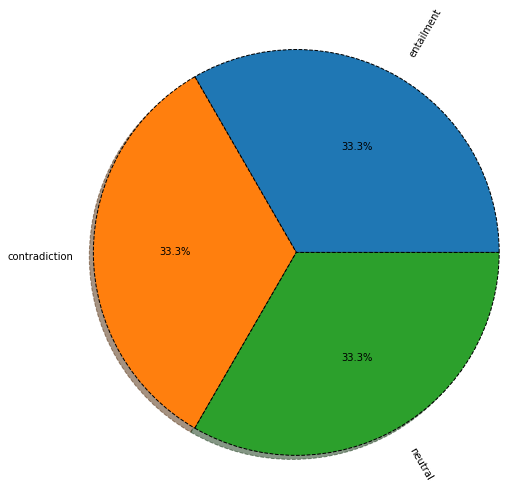

In [41]:
vals = train_labels['gold_label'].value_counts()
labels = ['entailment', 'contradiction', 'neutral']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

In [42]:
dev_matched_labels['gold_label'].value_counts()

entailment       3479
contradiction    3213
neutral          3123
Name: gold_label, dtype: int64

(-1.1137660565499683,
 1.1006555593538712,
 -1.1105472465236184,
 1.1147626374314394)

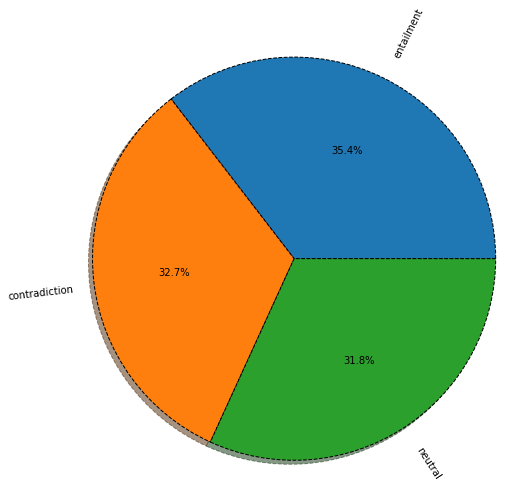

In [43]:
vals = dev_matched_labels['gold_label'].value_counts()
labels = ['entailment', 'contradiction', 'neutral']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

In [44]:
dev_mismatched_labels['gold_label'].value_counts()

entailment       3463
contradiction    3240
neutral          3129
Name: gold_label, dtype: int64

(-1.1134315797769723,
 1.1006395990369986,
 -1.1104673308884585,
 1.1136319940252226)

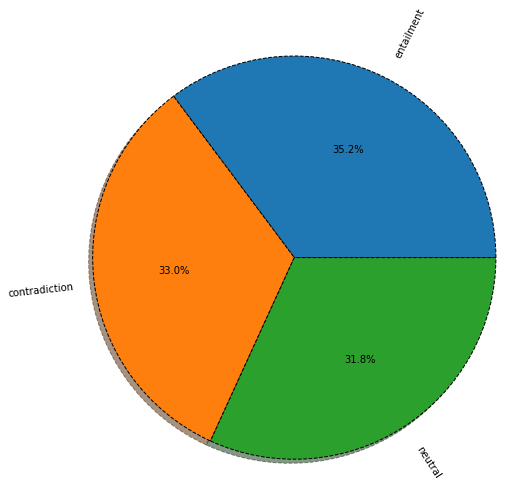

In [45]:
vals = dev_mismatched_labels['gold_label'].value_counts()
labels = ['entailment', 'contradiction', 'neutral']
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(vals, labels=labels, autopct='%1.1f%%', shadow=True, wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"}, rotatelabels=True)
ax.axis("equal")

In [46]:
#Выбор столбцов для конвейров

In [48]:
For_Selector1 = ['sentence1']

In [49]:
For_Selector2 = ['sentence2']

In [51]:
#Базовая модель (из прошлой задачи)

In [52]:
pipe1 = Pipeline([('Selector', Selector(For_Selector1)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer())])

In [53]:
pipe2 = Pipeline([('Selector', Selector(For_Selector2)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer())])

In [54]:
full_pipeline = FeatureUnion(transformer_list=[
    ('pipe1', pipe1),
    ('pipe2', pipe2)
])

In [55]:
full_pipeline.fit(train)

FeatureUnion(transformer_list=[('pipe1',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence1'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer())])),
                               ('pipe2',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence2'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer())]))])

In [56]:
train_transform = full_pipeline.transform(train)

In [57]:
dev_matched_transform = full_pipeline.transform(dev_matched)

In [58]:
dev_mismatched_transform = full_pipeline.transform(dev_mismatched)

In [59]:
test_matched_transform = full_pipeline.transform(test_matched)

In [60]:
test_mismatched_transform = full_pipeline.transform(test_mismatched)

In [61]:
train_transform

<392702x115643 sparse matrix of type '<class 'numpy.float64'>'
	with 10207674 stored elements in Compressed Sparse Row format>

In [62]:
logreg = LogisticRegression()

In [63]:
logreg.fit(train_transform, train_labels)

LogisticRegression()

In [64]:
logreg.score(train_transform, train_labels)

0.5772748801890492

In [65]:
logreg.score(dev_matched_transform, dev_matched_labels)

0.546510443199185

In [66]:
logreg.score(dev_mismatched_transform, dev_mismatched_labels)

0.5359031733116355

In [67]:
#Поиск оптимальной модели для новой задачи

In [68]:
#Проанализированная сетка параметров
#TfidfVectorizer()
#min_df = 1, 5, 10
#stop_words = None, 'english'
#ngram_range = (1, 1), (1, 2), (1, 3)
#LogisticRegression(), LinearSVC()
#С = 0.01, 0.1, 1, 10, 100

In [69]:
pipe4 = Pipeline([('Selector', Selector(For_Selector1)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer(lowercase = True, min_df=5, stop_words=None, ngram_range=(1,2)))])

In [70]:
pipe5 = Pipeline([('Selector', Selector(For_Selector2)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer(lowercase = True, min_df=5, stop_words=None, ngram_range=(1,2)))])

In [71]:
pipe6 = Pipeline([('Selector', Selector(For_Selector1)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer(lowercase = True, min_df=5, stop_words=None, ngram_range=(1,3)))])

In [72]:
pipe7 = Pipeline([('Selector', Selector(For_Selector2)), ('To_list', To_list()), ('TfidfVectorizer', TfidfVectorizer(lowercase = True, min_df=5, stop_words=None, ngram_range=(1,3)))])

In [73]:
full_pipeline3 = FeatureUnion(transformer_list=[
    ('pipe4', pipe4),
    ('pipe5', pipe5)
])

In [74]:
full_pipeline4 = FeatureUnion(transformer_list=[
    ('pipe6', pipe6),
    ('pipe7', pipe7)
])

In [75]:
full_pipeline3.fit(train)

FeatureUnion(transformer_list=[('pipe4',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence1'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer(min_df=5,
                                                                 ngram_range=(1,
                                                                              2)))])),
                               ('pipe5',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence2'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer(min_df=5,
                              

In [76]:
train_transform3 = full_pipeline3.transform(train)

In [77]:
dev_matched_transform3 = full_pipeline3.transform(dev_matched)

In [78]:
dev_mismatched_transform3 = full_pipeline3.transform(dev_mismatched)

In [79]:
full_pipeline4.fit(train)

FeatureUnion(transformer_list=[('pipe6',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence1'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer(min_df=5,
                                                                 ngram_range=(1,
                                                                              3)))])),
                               ('pipe7',
                                Pipeline(steps=[('Selector',
                                                 Selector(features=['sentence2'])),
                                                ('To_list', To_list()),
                                                ('TfidfVectorizer',
                                                 TfidfVectorizer(min_df=5,
                              

In [80]:
train_transform4 = full_pipeline4.transform(train)

In [81]:
dev_matched_transform4 = full_pipeline4.transform(dev_matched)

In [82]:
dev_mismatched_transform4 = full_pipeline4.transform(dev_mismatched)

In [83]:
logreg3 = LogisticRegression(C=1)

In [84]:
logreg3.fit(train_transform4, train_labels)

LogisticRegression(C=1)

In [85]:
logreg3.score(train_transform4, train_labels)

0.6397955701778957

In [86]:
print("Спрогнозированные вероятности для обучающего набора:\n{}".format(logreg3.predict_proba(train_transform4)))

Спрогнозированные вероятности для обучающего набора:
[[0.19961609 0.50095863 0.29942528]
 [0.05167683 0.83015164 0.11817153]
 [0.1120744  0.40387699 0.48404861]
 ...
 [0.41496865 0.36416953 0.22086182]
 [0.03008759 0.12799036 0.84192205]
 [0.42932083 0.27864913 0.29203004]]


In [87]:
logreg3.score(dev_matched_transform4, dev_matched_labels)

0.5534386143657667

In [88]:
print("Спрогнозированные вероятности для валидационного набора (matched):\n{}".format(logreg3.predict_proba(dev_matched_transform4)))

Спрогнозированные вероятности для валидационного набора (matched):
[[0.78961275 0.08372844 0.12665881]
 [0.47091495 0.11558904 0.41349601]
 [0.02174028 0.43128161 0.54697811]
 ...
 [0.40514852 0.27679935 0.31805213]
 [0.46528021 0.34996087 0.18475892]
 [0.9731129  0.01256142 0.01432568]]


In [89]:
logreg3.score(dev_mismatched_transform4, dev_mismatched_labels)

0.5485150528885273

In [90]:
print("Спрогнозированные вероятности для валидационного набора (mismatched):\n{}".format(logreg3.predict_proba(dev_mismatched_transform4)))

Спрогнозированные вероятности для валидационного набора (mismatched):
[[0.77118888 0.08500947 0.14380165]
 [0.04485839 0.86018514 0.09495647]
 [0.26019891 0.63001579 0.1097853 ]
 ...
 [0.85170513 0.06958139 0.07871348]
 [0.75333756 0.11521835 0.1314441 ]
 [0.08686341 0.66729385 0.24584274]]


In [91]:
lsvc = LinearSVC(C=0.1, random_state=0)

In [92]:
lsvc.fit(train_transform3, train_labels)

LinearSVC(C=0.1, random_state=0)

In [93]:
lsvc.score(train_transform3, train_labels)

0.6711628664992794

In [94]:
print("Спрогнозированные значения решающей функции для обучающего набора:\n{}".format(lsvc.decision_function(train_transform3)))

Спрогнозированные значения решающей функции для обучающего набора:
[[-0.66154189 -0.04122289 -0.29294891]
 [-0.95011748  0.43197761 -0.48479098]
 [-0.85929505 -0.16618224  0.03687708]
 ...
 [-0.20731613 -0.21925299 -0.56359111]
 [-0.95104853 -0.52987327  0.47677261]
 [-0.40812719 -0.5367664  -0.06073861]]


In [95]:
lsvc.score(dev_matched_transform3, dev_matched_labels)

0.5559857361181865

In [96]:
print("Спрогнозированные значения решающей функции для валидационного набора (matched):\n{}".format(lsvc.decision_function(dev_matched_transform3)))

Спрогнозированные значения решающей функции для валидационного набора (matched):
[[ 0.35399074 -0.70706048 -0.65401546]
 [-0.03454189 -0.7436174  -0.23676066]
 [-1.1173504  -0.25514786  0.3447404 ]
 ...
 [-0.26959802 -0.27846121 -0.46036705]
 [-0.26872214 -0.13178113 -0.60111514]
 [ 0.81707075 -1.0666741  -0.80260931]]


In [97]:
lsvc.score(dev_mismatched_transform3, dev_mismatched_labels)

0.5512611879576892

In [98]:
print("Спрогнозированные значения решающей функции для валидационного набора (mismatched):\n{}".format(lsvc.decision_function(dev_mismatched_transform3)))

Спрогнозированные значения решающей функции для валидационного набора (mismatched):
[[ 0.34928565 -0.81249557 -0.59643352]
 [-0.93754844  0.4782492  -0.53643667]
 [-0.24685724  0.05082822 -0.80162347]
 ...
 [ 0.60536089 -0.81120098 -0.83176506]
 [ 0.27329825 -0.68140339 -0.58532974]
 [-0.77792472  0.10917427 -0.33101338]]


In [99]:
#Получение прогнозов на тестовых наборах и их обработка для правильной загрузки в файлы результатов

In [100]:
test_matched_transform3 = full_pipeline3.transform(test_matched)

In [101]:
test_mismatched_transform3 = full_pipeline3.transform(test_mismatched)

In [102]:
test_res_matched = lsvc.predict(test_matched_transform3)
test_res_matched

array(['entailment', 'entailment', 'contradiction', ..., 'neutral',
       'contradiction', 'entailment'], dtype=object)

In [103]:
test_res_mismatched = lsvc.predict(test_mismatched_transform3)
test_res_mismatched

array(['neutral', 'entailment', 'entailment', ..., 'neutral', 'neutral',
       'neutral'], dtype=object)

In [104]:
test_res_matched = pd.DataFrame(test_res_matched, columns=['predicted label'])
test_res_matched

,predicted label
0,entailment
1,entailment
2,contradiction
3,neutral
4,contradiction
...,...
9791,contradiction
9792,neutral
9793,neutral
9794,contradiction


In [105]:
test_res_mismatched = pd.DataFrame(test_res_mismatched, columns=['predicted label'])
test_res_mismatched

,predicted label
0,neutral
1,entailment
2,entailment
3,neutral
4,contradiction
...,...
9842,entailment
9843,neutral
9844,neutral
9845,neutral


In [106]:
test_res_matched['pairID'] = test_pair_id_m
test_res_matched

,predicted label,pairID
0,entailment,9847
1,entailment,9848
2,contradiction,9849
3,neutral,9850
4,contradiction,9851
...,...,...
9791,contradiction,19638
9792,neutral,19639
9793,neutral,19640
9794,contradiction,19641


In [107]:
test_res_mismatched['pairID'] = test_pair_id_mm
test_res_mismatched

,predicted label,pairID
0,neutral,0
1,entailment,1
2,entailment,2
3,neutral,3
4,contradiction,4
...,...,...
9842,entailment,9842
9843,neutral,9843
9844,neutral,9844
9845,neutral,9845


In [108]:
dfa = test_res_matched['pairID']
dfb = test_res_matched['predicted label']

In [109]:
dfc = test_res_mismatched['pairID']
dfd = test_res_mismatched['predicted label']

In [110]:
dfres_matched = pd.DataFrame(dfa, columns=['pairID'])
dfres_matched

,pairID
0,9847
1,9848
2,9849
3,9850
4,9851
...,...
9791,19638
9792,19639
9793,19640
9794,19641


In [111]:
dfres_mismatched = pd.DataFrame(dfc, columns=['pairID'])
dfres_mismatched

,pairID
0,0
1,1
2,2
3,3
4,4
...,...
9842,9842
9843,9843
9844,9844
9845,9845


In [112]:
dfres_matched['predicted label'] = dfb
dfres_matched

,pairID,predicted label
0,9847,entailment
1,9848,entailment
2,9849,contradiction
3,9850,neutral
4,9851,contradiction
...,...,...
9791,19638,contradiction
9792,19639,neutral
9793,19640,neutral
9794,19641,contradiction


In [113]:
dfres_mismatched['predicted label'] = dfd
dfres_mismatched

,pairID,predicted label
0,0,neutral
1,1,entailment
2,2,entailment
3,3,neutral
4,4,contradiction
...,...,...
9842,9842,entailment
9843,9843,neutral
9844,9844,neutral
9845,9845,neutral


In [ ]:
#Загрузка результатов в файлы

In [122]:
dfres_matched.to_csv("D:/results_matched.csv", header=True, index=False)

In [123]:
dfres_mismatched.to_csv("D:/results_mismatched.csv", header=True, index=False)